# Descriptive Statistics Review

## Before you start:

- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

## Context

![img](../data/diamonds.jpg)

The dataset we will be using is comprised of approximately 54k rows and 11 different columns. As always a row represents a single observation (in this case a diamond) and each of the columns represent a different feature of a diamond.

In this lab we will first explore our dataset to better understand the data we have and then try to determine which characteristics of a diamond are more likely to influence its price.

The following codebook was provided together with the dataset to clarify what each column represents:


| Column  | Description  |
|---|---|
| Price  | Price in US dollars (326-18,823)  |
| Carat  | Weight of the diamond (0.2--5.01)  |
| Cut  | Quality of the cut (Fair, Good, Very Good, Premium, Ideal)  |
| Color  | Diamond colour, from J (worst) to D (best)  |
| Clarity  | A measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))   |
| x  | Length in mm (0--10.74)  |
| y  | Width in mm (0--58.9)  |
| z  | Depth in mm (0--31.8)  |
| Depth  | Total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)  |
| Table  | Width of top of diamond relative to widest point (43--95)  |

## Libraries
Pandas and numpy will be needed for the analysis of the data. Don't worry about the seaborn and matplotlib import at the moment, you will learn more about them in the following week.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

First import the data from the .csv file provided and assign it to a variable named `diamonds` and drop the column with the index.

In [6]:
#your code here
diamonds = pd.read_csv('../data/diamonds.csv', index_col = 0)

# 1. Taking the first look on the data.
Let's see how the data looks like by using pandas methods like `head()`, `info()` and `describe()`. 

**First, use the `head` method.**

In [7]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
diamonds.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [10]:
diamonds.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
24785,2.75,Ideal,D,I1,60.9,57.0,13156,9.04,8.98,5.49
48599,0.70,Fair,I,VS2,64.4,55.0,1996,5.60,5.55,3.59
35809,0.31,Ideal,F,IF,62.1,54.0,914,4.33,4.37,2.70
47800,0.51,Ideal,H,IF,60.3,58.0,1899,5.15,5.17,3.11
30046,0.41,Premium,G,SI1,61.5,59.0,719,4.75,4.78,2.93


**What do you see? Do some comments about the values you see in each column, comparing with the codebook. Is that what you expected?**

In [11]:
# With .info() we get the total rows, the number of rows with non-null values, and the types.
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


It is very important to know the amount of data we have, because everything will depend on that, from the quality of the analysis to the choice on our infrastracture.

**Check the shape of the data**

In [13]:
# we don't use parenthesis. Shape is an atribute of df, but not a method.
diamonds.shape

(53940, 10)

The `clarity` column is confusing because we are not diamonds experts, so we will create a new column with a new scale better understandable for us.

**Create a new column with numbers from 0 to 7. The lowest would be 0 with value `I1` and the greatest 7 with value `IF`**

In [18]:
# zip functions takes each element of a list and create a tuple with the same element of the second list.
# commonly used in dictionary comprehension

clarity_keys = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
# clarity_dict = {key:value for key, value in zip(clarity_keys, range(len(clarity_keys)))} is the same as:
clarity_dict = dict(zip(clarity_keys, range(len(clarity_keys))))

diamonds['clarity'].replace(clarity_dict, inplace=True)
# diamonds.replace({'clarity':clarity_dict}, inplace = True)

In [19]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,1,63.3,58.0,335,4.34,4.35,2.75


It makes sense to do the same with the `color` column.

**Do the same with values from 0 to 6. Read the codebook to see the match**

In [20]:
diamonds.color.unique()
color_unique_list = ['J','I','H','G','F','E','D']
color_dict = {key: value for key, value in zip(color_unique_list, range(len(color_unique_list)))}
diamonds.replace({'color':color_dict}, inplace=True)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,5,1,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,5,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,5,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,1,3,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,0,1,63.3,58.0,335,4.34,4.35,2.75


With the `info` method, we can see the features of the dataset, the amount of observations (rows) that have a non-null value and the types of the features. 

**Now use the `info` method and comparing with the shape, comment what you see**

In [24]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null int64
clarity    53940 non-null int64
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(3), object(1)
memory usage: 4.5+ MB


**Check the types of each column and comment if it matches with the expected**

In [25]:
diamonds.dtypes

carat      float64
cut         object
color        int64
clarity      int64
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

# 2. A deeper look: checking the basic statistics.

The `describe` method gives us an overview of our data. From here we can see all the descriptive metrics and take further steps, if needed.

**Use the `describe` method and comment what you see**

In [26]:
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Check the columns with `x`, `y` and `z` with value 0 in all of them and comment what you see**

In [31]:
#your code here
diamonds_filtered = diamonds.query('x == 0 or y == 0 or z == 0').copy()

**Create a function named `calculate_z` that applies the function in the codebook to one single row you give to the function**

In [32]:
#based on formula Total depth percentage = z / mean(x, y) = 2 * z / (x + y)
def calculate_z(row):
    return row.depth * (row.x + row.y) / (2*100)

**Apply it just to the rows with wrong values**

In [34]:
diamonds_filtered.z = diamonds_filtered.apply(calculate_z, axis=1)

# we can use merge function but the fastest way is update
diamonds.update(diamonds_filtered)

**Replace the zero values in the `z` column for a NaN**

In [35]:
cols = ['x', 'y','z']
diamonds[cols] = diamonds[cols].replace(0, np.NaN)

In [37]:
diamonds.dropna(inplace=True)
diamonds.shape

(53932, 10)

----
# Bonus: let's check the new z values
Since with data we need to be 100% sure of our data, let's create a function that validates our z. To do so, we will use the same formula, but this time we will calculate the value of depth with the new value assigned to z.

**Create a function named `validate_z` that compares the `z`  in cells above with the one thrown by the formula and run it with the rows you changed in the cells above**

In [26]:
#your code here

Let's check the data again with the `describe()` method.

In [1]:
#your code here

**Check how many outliers do you have and comment what you would do with those values**

In [29]:
#your code here

# 3. Checking the outliers
Now we're going to revisit the summary table and check for outliers.

**Use the `describe` method again and comment the statistics, after that look if you have any outlier** 

In [38]:
#your code here
diamonds.describe()

,carat,color,clarity,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,3.405789,3.051101,61.749336,57.457029,3932.136079,5.732007,5.735254,3.540265
std,0.473986,1.701165,1.647109,1.432514,2.234064,3988.734835,1.119670,1.140343,0.702667
min,0.200000,0.000000,0.000000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,2.000000,2.000000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,4.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [33]:
#your comments here


We're going to filter our DataFrame, we're going to take all the values that have a price higher than the 75th percentile.

**Look for that quantile and filter the dataframe to clearly see the outliers. What do you think?**

In [35]:
#your code here

**Use a box plot to check for the outliers**

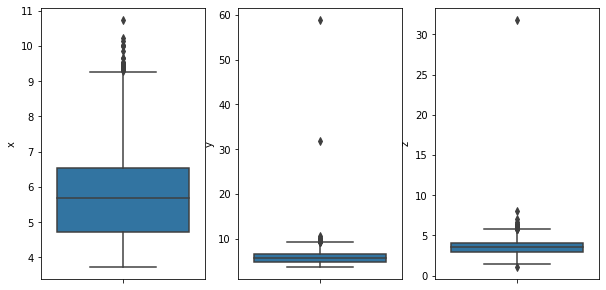

In [46]:
#your code here
fig, ax = plt.subplots(1,3, figsize = (10,5))
sns.boxplot(y=diamonds.x, ax=ax[0])
sns.boxplot(y=diamonds.y, ax=ax[1])
sns.boxplot(y=diamonds.z, ax=ax[2])

Now we can see that all the values are within an acceptable range, but we have 2 big outliers in y and 1 in z. Now we now that our max values for y should be around 10 and the values for z should be around 6, so let's filter our dataset to find values higher than 10 in it.


In [52]:
diamonds.loc[(diamonds.y > 11) | (diamonds.z > 11)]

,carat,cut,color,clarity,depth,table,price,x,y,z
24068,2.00,Premium,2.0,1.0,58.9,57.0,12210.0,8.09,58.90,8.06
48411,0.51,Very Good,5.0,4.0,61.8,54.7,1970.0,5.12,5.15,31.80
49190,0.51,Ideal,5.0,4.0,61.8,55.0,2075.0,5.15,31.80,5.12


In [53]:
rows_to_drop = diamonds.loc[(diamonds.y > 11) | (diamonds.z > 11)]

In [55]:
diamonds.drop(rows_to_drop.index, inplace = True)

Now that we have found the outlier, let's use the function we defined earlier to correct this value. First, we need to change the value to 0 (because that's how we defined the function before) and then we will apply it.

**Apply `calculate_z` to the row with the outlier**

In [40]:
#your code here

Let's check if we actually corrected the outlier.

In [ ]:
# your code here

Cool! Now let's validate our new `z`. We will check if we obtain the same value of depth using our validate function. If the formula applies, this means could approximate the real value of `z`.

**Apply `validate_z` to the row used earlier**

In [43]:
#your code here

Now let's do the same for `y`. First, let's filter the DataFrame to find the outliers. We said that the maximum values should be around 10, so let's check what are the values above 10.

**Check the values greater than 10 in the `y` column** 

In [48]:
#your code here

**Create a function named `calculate_y` to calculate `y` using `z` and `x` the same way you did above**

In [50]:
#your code here

We will check the rows that had an outlier in `y`, to check that the values were changed.

**Check those rows (also validating with your function) and comment what you see**

Now that we have corrected or dropped all of our outliers, lets plot another box plot to double check.

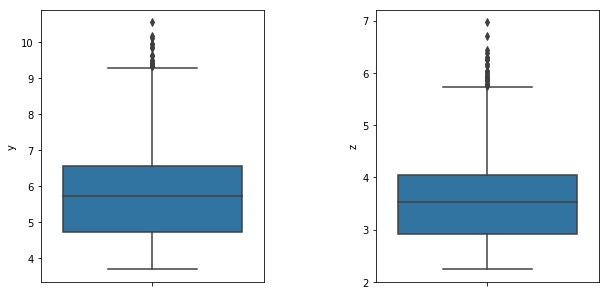

In [60]:
#Run this code
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(y=diamonds.y, ax=ax[0])
sns.boxplot(y=diamonds.z, ax=ax[1])
plt.subplots_adjust(wspace=0.5)

**What do you think?**


In [61]:
#your thoughts here

**Once you are happy with your cleaning, save the cleaned data and continue to another notebook to have a more organized way of working. Your new csv will be named ``diamonds_clean``**

In [62]:
#your code here

In [63]:
#Solution
diamonds.to_csv("../data/diamonds_clean.csv")